In [37]:
import numpy as np
import pandas as pd
import re
from IPython.display import IFrame
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from jupyterthemes import jtplot

%matplotlib inline

In [38]:
no7primerURL = "https://www.walgreens.com/store/c/no7-airbrush-away-original-primer/ID=prod6329637-product" #ssh
elauddwearURL = "https://www.ulta.com/double-wear-stay-in-place-makeup?productId=xlsImpprod14641507"
# IFrame(src=elauddwearURL,width=800,height=800)

## __Ulta Data Cleaning__

In [39]:
ultadf_bef = pd.read_csv("ulta1.csv")
ultadf.head(10)

,Product,Brand,Ingredients,Price,Rev_score,Size,Rev_count,Shop
0,Double Duty Beauty Shape Tape Contour Concealer,Tarte,"12S Fair: Water/Aqua/Eau, Cyclopentasiloxane, ...",27.0,93.0,0.33,10981.0,Ulta
1,CC+ Cream with SPF 50+,It Cosmetics,Active: Titanium Dioxide 9.0% Zinc Oxide 6.3%....,39.0,87.0,1.08,13808.0,Ulta
2,Double Wear Stay In Place Makeup,Estée Lauder,"Water\Aqua\Eau, Cyclopentasiloxane, Trimethyls...",43.0,90.0,1.00,2618.0,Ulta
3,Continuous Setting Mist,Morphe,"Water, Glycerin, Butylene Glycol, Propylene Gl...",16.0,91.0,2.80,1115.0,Ulta
4,I Am Magic Foundation,Juvia's Place,"Water, Dimethicone, Isododecane, Methyl Trimet...",20.0,NaN,1.00,NaN,Ulta
5,ORIGINAL Foundation Broad Spectrum SPF 15,BareMinerals,"Active Ingredients: Titanium Dioxide 12.6%, Zi...",31.0,97.0,0.28,12937.0,Ulta
6,Face Tape Foundation,Tarte,"8S: Water/Aqua/Eau, Cyclopentasiloxane, Methyl...",39.0,NaN,1.01,NaN,Ulta
7,Born This Way Undetectable Medium-to-Full Cove...,Too Faced,"Natural Beige: Water/Aqua/Eau, Cyclopentasilox...",39.0,83.0,1.00,6920.0,Ulta
8,Complexion Rescue Tinted Hydrating Gel Cream B...,BareMinerals,Active: Titanium Dioxide 6.2%. Inactive: Water...,32.0,89.0,1.18,4942.0,Ulta
9,Studio Fix Powder Plus Foundation,MAC,"Talc, Silica, Isostearyl Palmitate, Methicone,...",31.0,93.0,0.52,432.0,Ulta


## __Walgreens Data Cleaning__

In [40]:
walgdf_bef = pd.read_csv("walgreens1.csv")
walgdf.head(10)

,Product,Country,Ingredients,Price,Rev_score,Rev_count,Size,Brand
0,"CYO Long Lasting Foundation Lifeproof, 106",France,"Aqua (Water), Cyclopentasiloxane, Caprylyl met...",7.00,4.4,132,1.00,CYO
1,CYO Fixing Powder All Set,NaN,"Talc, Aluminum starch octenylsuccinate, Isoste...",5.00,4.8,10,0.52,CYO
2,"Coty Airspun Loose Face Powder, Naturally Neutral",China,"Talc, Calcium Silicate, Isopropyl Palmitate, C...",7.99,4.4,25,2.30,Coty
3,CYO Illuminating Mixing Cream Turn On The Ligh...,NaN,"Caprylic/capric triglyceride, Aluminum starch ...",5.50,4.3,30,1.00,CYO
4,"Wet n Wild MegaGlo Highlighter, Precious Petal...",China,"Boron Nitride, Dimethicone, Octyldodecyl Stear...",5.29,5.0,9,0.19,Wet n Wild
5,CYO Matte & Blur Primer Matte-Attack,Germany,"Aqua (Water), Cyclopentasiloxane, Isohexadecan...",5.00,4.6,16,1.00,CYO
6,Milani Conceal + Perfect 2-in-1 Foundation + C...,USA,"Water (Aqua), Cyclopentasiloxane, Isononyl Iso...",NaN,4.5,485,1.00,Milani
7,Maybelline Instant Age Rewind Eraser Dark Circ...,USA,NaN,8.49,4.1,1077,0.20,Maybelline
8,No7 Airbrush Away Original Primer,Germany,"Cyclopentasiloxane, Aqua (Water), Butylene Gly...",19.99,4.3,174,1.01,No7
9,"Rimmel Stay Matte Pressed Powder, Transparent",England,NaN,5.29,4.4,859,0.49,Rimmel


## __Ulta Dataset__

In [41]:
ultadf = pd.read_csv('ultadf.csv')
ultadf.sample(10)
# ultadf.Brand.nunique() -139

,Product,Brand,Ingredients,Price,Rev_score,Size,Rev_count
195,Flawless Creator Multi-Use Liquid Foundation D...,Dermablend,"Cyclopentasiloxane, Dimethicone, Isododecane, ...",40.00,80.0,1.000,188.0
1582,Online Only Glitter Gelly,Wunder2,"Water (Aqua/Eau), Polyethylene Terephthalate, ...",15.95,NaN,0.033,NaN
1328,Online Only Tan Time Powder Bronzer,Lottie London,NaN,6.99,86.0,0.310,17.0
680,The POREfessional: Matte Rescue Mattifying Gel...,Benefit Cosmetics,"Aqua, Glycerin, Propanediol, Silica, Dimethico...",13.00,75.0,0.500,488.0
128,Bye Bye Lines Foundation,It Cosmetics,"Aqua/Water/Eau, Glycerin, Glycereth-26, PEG-8,...",38.00,74.0,1.000,227.0
1283,Online Only Island Time Highlighter,Ofra Cosmetics,This item is not eligible for coupon discounts...,29.00,67.0,0.350,19.0
724,Skin Perfecting Powder Balancing Act,PÜR,"Synthetic Fluorphlogopite, Mica, Lauroyl Lysin...",26.00,90.0,0.280,15.0
155,Pores No More Pore Refiner Primer,Dr. Brandt,"Cyclopentasiloxane, Dimethicone Crosspolymer, ...",45.00,89.0,1.000,262.0
897,Green Tea Blotting Linens,boscia,"100% Natural Abaca Leaf Fiber, Green Tea\n\nPl...",10.00,NaN,NaN,NaN
1443,Glazen Highlighting Gel,Butter London,"Chandelier: Aqua (Water/Eau), Synthetic Fluorp...",26.00,100.0,0.330,6.0


In [42]:
ultadf.groupby('Brand').agg({'Price':['mean','max','min'], 'Size':['mean'], 'Rev_score':['mean','max','min']}).head(10)

Price                    Size   Rev_score         \
                              mean    max    min      mean        mean    max   
Brand                                                                           
Almay                    11.545556  14.99   5.99  3.396667   76.142857   86.0   
Amazing Cosmetics        32.800000  35.00  28.00  0.696000   89.000000   94.0   
Anastasia Beverly Hills  33.933333  45.00  18.00  0.775400   88.384615  100.0   
Aveeno                   23.990000  23.99  23.99  1.500000   76.000000   76.0   
Awake Beauty             32.000000  32.00  32.00  1.000000         NaN    NaN   
BECCA                    33.451613  48.00  19.00  0.661833   84.160000   96.0   
BH Cosmetics             13.250000  24.00   6.00  1.108889   84.142857  100.0   
Bali Body                29.950000  29.95  29.95  1.200000  100.000000  100.0   
BareMinerals             25.785714  39.00  12.00  0.984146   89.425000  100.0   
Beauty Bakerie           28.000000  38.00  14.00  0.526667   87.285714  100.0   

                                
                           min  
Brand                           
Almay                     66.0  
Amazing Cosmetics         82.0  
Anastasia Beverly Hills   71.0  
Aveeno                    76.0  
Awake Beauty               NaN  
BECCA                     70.0  
BH Cosmetics              65.0  
Bali Body                100.0  
BareMinerals              67.0  
Beauty Bakerie            63.0

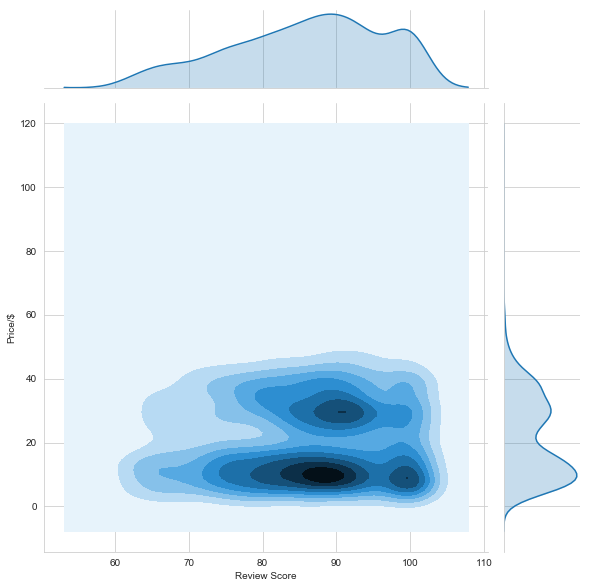

In [43]:
sns.set_style("whitegrid")
plt2=sns.jointplot(x="Rev_score", y="Price", data=ultadf, kind='kde', height=8.27)
plt2 = (plt2.set_axis_labels("Review Score","Price/$"))

In [44]:
print(ultadf.Brand.value_counts().head(5))
print(ultadf.Brand.value_counts().tail(5))
# Perhaps drop single item brands

e.l.f. Cosmetics           70
NYX Professional Makeup    64
ULTA                       54
Catrice                    49
Tarte                      49
Name: Brand, dtype: int64
C&C by Clean & Clear    1
LASplash Cosmetics      1
Bali Body               1
LashFood                1
Mamonde                 1
Name: Brand, dtype: int64


In [45]:
ultadfBrand = ultadf.groupby("Brand").filter(lambda x: len(x)>5)
print(ultadfBrand.Brand.nunique())
ultadfBrand.sample(15)

66


,Product,Brand,Ingredients,Price,Rev_score,Size,Rev_count
905,Gently Off Eye and Lip Makeup Remover,MAC,"Water / Aqua / Eau, Cyclopentasiloxane, Isohex...",22.00,75.0,3.40,7.0
1466,Online Only B.A.E. Illuminating Face Primer,Lottie London,NaN,NaN,67.0,0.98,6.0
909,ColorStay Prep & Protect Primer,Revlon,"Active Ingredients: (Titanium Dioxide 3.6%, Zi...",13.99,89.0,0.90,291.0
1547,Online Only Allround Contouring Palette,Catrice,"Shades 1,2: Octyldodecanol, Caprylic / Capric ...",6.49,NaN,0.21,NaN
745,Extra Dimension Blush,MAC,"Mica, Cetearyl Ethylhexanoate, C12-20 Acid PEG...",30.00,92.0,0.14,14.0
141,Naked Skin One & Done,Urban Decay Cosmetics,"Active: Octinoxate 7.5%, Zinc Oxide 3.4%.\n\nI...",36.00,86.0,1.30,1142.0
1212,Spotlight Illuminating Primer,Physicians Formula,"Water/Eau, Dodecane, Ethylhexyl Palmitate, Gly...",15.99,82.0,1.00,70.0
1405,Online Only Unicorn Hi-Lite Palette,Lime Crime,"Calcium Sodium Borosilicate, Calcium Titanium ...",38.00,100.0,0.75,8.0
404,All Nighter Waterproof Full-Coverage Concealer,Urban Decay Cosmetics,"Aqua / Water, Cyclopentasiloxane, Methyl Metha...",29.00,67.0,0.12,171.0
546,Photo Finish Radiance Primer,Smashbox,"Water\Aqua\Eau, Butyrospermum Parkii (Shea But...",39.00,83.0,1.00,149.0


In [46]:
ultadfBrand2 = pd.concat([ultadfBrand, ultadfBrand['Ingredients'].str.get_dummies(sep=', ')], axis=1)
ultadfBrand2.sample(10)

,Product,Brand,Ingredients,Price,Rev_score,Size,Rev_count,Talc,Methyl Gluceth-20,Titanium Dioxide (CI 77891),...,parfum (natural).,phenoxyethanol,propylparaben,refer to the product packaging.,rosa damascena flower water,saccharomyces/xylinum/black tea ferment,sodium chloride,sorbitan oleate decylglucoside crosspolymer,tetrasodium edta,tocopherol
261,Effacernes Waterproof Protective Undereye Conc...,Lancôme,"Aqua / Water / Eau, Cyclopentasiloxane, Hydrog...",31.00,85.0,0.520,228.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018,Solstice Highlighting Palette,Sleek MakeUP,"Cream: Ethylhexyl Palmitate, Mica, Dimethicone...",14.99,93.0,0.317,161.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,Baked Sculpt & Glow 3-in-1 Palette,ULTA,NaN,15.00,97.0,0.510,40.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,True Match Lumi Glow Amour Glow Boosting Drops,L'Oréal,"Cyclopentasiloxane, Dimethicone, Isododecane, ...",14.99,NaN,0.280,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,Youthful Glow Primer Serum,ULTA,"Water, Glycerin, Propanediol, Phenoxyethanol, ...",18.00,76.0,0.600,51.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1363,Copperplate Highlighting Palette,Sleek MakeUP,"Shade 1: Mica, Butylene Glycol, Nylon-12, Sili...",14.99,100.0,NaN,15.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390,Travel Size Take The Day Off Cleansing Balm,Clinique,"Ethylhexyl Palmitate, Carthamus Tinctorius (Sa...",9.50,96.0,1.000,79.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
879,Pressed Banana Powder Compact,Ofra Cosmetics,This item is not eligible for coupon discounts...,12.00,94.0,0.140,70.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1503,Travel Size No Makeup Foundation Serum Broad S...,Perricone MD,This item is not eligible for coupon discounts...,22.00,NaN,0.300,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1262,Online Only Skin Finish Baked Highlighter Powder,Revolution PRO,"Mica, Synthetic Fluorphlogopite, Nylon-12, Mag...",8.00,100.0,0.400,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
ultadfBrand3 = pd.melt(ultadfBrand2, id_vars=['Product', 'Brand', 'Ingredients', 'Price', 'Rev_score', 'Size', 'Rev_count'],
                      value_name="Included", var_name="Ing")
ultadfBrand3.sample(15)

,Product,Brand,Ingredients,Price,Rev_score,Size,Rev_count,Ing,Included
3053484,Travel Size Matte Face Primer,ULTA,"Cyclopentasiloxane, Dimethicone, Dimethicone C...",8.50,92.0,0.51,34.0,Hydrogenated Olive Oil,0
4883017,Mineral Wear Talc-Free Mineral Airbrushing Pre...,Physicians Formula,"Titanium Dioxide, Zinc Oxide. Inactive Ingredi...",14.99,75.0,0.26,248.0,Polymethyl Methacrylate,0
1325124,"Online Only Clean Makeup, Normal Skin",CoverGirl,"Water, Propylene Glycol, Isopropyl Myristate, ...",7.49,67.0,1.00,249.0,CI77492,0
6383023,Continuous Setting Mist,Morphe,"Water, Glycerin, Butylene Glycol, Propylene Gl...",16.00,91.0,2.80,1115.0,VP / Hexadecene Copolymer,0
1314555,Fit Me Set + Smooth Pressed Powder,Maybelline,NaN,7.99,77.0,0.30,428.0,CI 77891 (Titanium dioxide)].,0
3008752,Light Reflecting Pressed Setting Powder,NARS,"Synthetic Fluorphlogopite, Silica, Cetearyl Et...",37.00,80.0,0.24,12.0,Honey Extract\Mel\Extrait De Miel,0
2864346,BH Liquid Foundation - Naturally Flawless,BH Cosmetics,"Water/Aqua/Eau, Isododecane, Propylene Glycol,...",9.50,65.0,1.00,99.0,Glycosaminoglycans,0
3553917,Shake & Bake,PÜR,"Light: Glycerin, Propylene Glycol, Silica Sily...",26.00,84.0,0.17,52.0,Leuconostoc Ferment Filtrate,0
2815676,Pro Fix Fixing Spray,Makeup Revolution,NaN,8.00,85.0,NaN,34.0,Glyceryl Ethylhexanoate/Stearate/Adipate,0
1649570,Triangle Artist Contour Stick,Catrice,NaN,8.99,100.0,0.18,2.0,Ceratonia Siliqua (Carob) Gum,0


In [48]:
ultadfBrand3.shape # 6730532 rows before removing 0s, 29278 after

(6730532, 9)

In [49]:
ultadfBrand3.Ing.nunique() #4687
ultadfBrand3 = ultadfBrand3[ultadfBrand3.Included != 0]
ultadfBrand3.sample(20)

,Product,Brand,Ingredients,Price,Rev_score,Size,Rev_count,Ing,Included
6668236,Sweet Cheeks Creamy Powder Blush (Glow),NYX Professional Makeup,"Talc, Trimethylsiloxyphenyl Dimethicone, Ethyl...",7.50,100.0,0.170,2.0,Zinc Oxide [Nano]/Zinc Oxide,1
1891797,Dandelion Brightening Baby-Pink Blush Mini,Benefit Cosmetics,"Talc, Mica, Calcium Aluminum Borosilicate, Pol...",16.00,96.0,0.120,226.0,Citronellol,1
3674566,Baked Highlighter & Blush,e.l.f. Cosmetics,"Highlighter: Mica, Talc, Ethylhexyl Palmitate,...",4.00,62.0,0.183,30.0,Magnesium Aluminum Silicate,1
3543297,CliniqueFIT Post-Workout Neutralizing Face Powder,Clinique,"Polyethylene, HDI/Trimethylol Hexyllactone Cro...",NaN,NaN,0.080,NaN,Lecithin,1
3219966,Rose Blush Trio Palette,Milani,"Talc, Mica (CI 77019), Aluminum Starch Octenyl...",12.99,70.0,0.420,59.0,Iron Oxides (CI 77491,1
3352273,Bronze Booster Glow-Boosting Pressed Bronzer,Physicians Formula,"Talc, Mica, Octyldodecyl Stearoyl Stearate, Di...",15.99,90.0,0.300,98.0,Isopropyl Isostearate,1
2516243,Bye Bye Pores Illumination,It Cosmetics,"Mica, Silica, Zinc Stearate, Caprylic/Capric T...",29.00,75.0,0.310,131.0,Ethylhexyl Palmitate,1
3352655,Hyper Real Palette: Shimmy Peach,MAC,"Talc, Isostearyl Neopentanoate, Zinc Stearate,...",39.50,NaN,0.450,NaN,Isopropyl Isostearate,1
1249219,Online Only Shimmer Squad Powder Highlighter Quad,Lottie London,"The Good Girl: Mica, Talc, Synthetic Fluorphlo...",10.99,100.0,0.590,23.0,CI 77499).\n\nThe Flirt: Mica,1
2973284,MegaGlo Contouring Palette,Wet n Wild,"Talc, Nylon-12, Boron Nitride, Aluminum Starch...",5.49,92.0,0.440,95.0,Hexylene Glycol,1


In [50]:
ingcount = ultadfBrand3.groupby('Ing').size().reset_index(name='counts').sort_values(by = 'counts', ascending=False)
ingcount.head(15)

,Ing,counts
3218,Phenoxyethanol,592
1579,Dimethicone,554
3814,Silica,544
803,CI 77492,412
2736,Mica,389
1941,Glycerin,387
1033,Caprylyl Glycol,379
4290,Tocopheryl Acetate,319
609,Butylene Glycol,305
1757,Ethylhexylglycerin,297


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

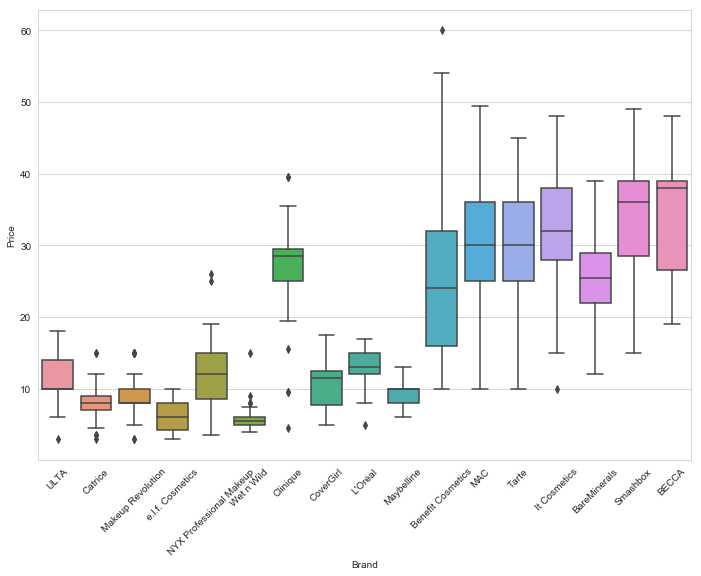

In [51]:
ultadfTop = ultadf.groupby("Brand").filter(lambda x: len(x)>30).sort_values(by='Price')
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_style("whitegrid", {'xtick.color': '1','yxtick.color': '1'})
plt1 = sns.boxplot(x="Brand", y="Price", data=ultadfTop, ax=ax) # Brands with more than 30 items
plt.xticks(rotation = 45)

In [52]:
ultadf.groupby('Brand').agg(['count','mean','max','min']).Price.sample(10)

,count,mean,max,min
Brand,,,,
Butter London,3,26.666667,28.00,26.00
Nuface,1,20.000000,20.00,20.00
e.l.f. Cosmetics,70,6.157143,10.00,3.00
DERMAFLASH,2,30.000000,45.00,15.00
Kopari Beauty,4,25.750000,32.00,18.00
Estée Lauder,17,37.382353,52.00,10.00
I Heart Revolution,9,7.111111,8.00,7.00
Bioré,9,5.934444,7.99,4.49
Revlon,19,11.216316,14.99,2.79


In [53]:
ultadf['Shop'] = "Ulta"

## __Walgreens Dataset__

In [54]:
walgdf = pd.read_csv('walgdf.csv')
walgdf.sample(10)

,Product,Country,Ingredients,Price,Rev_score,Rev_count,Size,Brand
493,"Milani Contour Highlight Cream & Liquid Duo, L...",NaN,"Contour: Ethylhexyl Palmitate, Polyethylene, B...",10.99,NaN,495,0.14,Milani
400,"Neutrogena Hydro Boost Illuminator, Moonstone",United States,"CAPRYLIC/CAPRIC TRIGLYCERIDE, TRIETHYLHEXANOIN...",16.99,4.5,93,0.32,Neutrogena
691,"L'Oreal Paris Lumi Powder Glow Illuminator, Ice",United States,"TALC, SYNTHETIC FLUORPHLOGOPITE, TRIISOSTEARIN...",12.79,3.6,42,0.31,L'Oreal
492,IMAN Cosmetics Under Cover Agent Oil Control P...,China,"Water(Aqua), Cyclopentasiloxane, Butylene Glyc...",17.99,NaN,495,1.00,IMAN
742,Revlon Designer Collection Slanted Tweezer,NaN,NaN,NaN,3.6,5,1.00,Revlon
423,"Maybelline Dream Matte Mousse Foundation, Natu...",NaN,"Cyclopentasiloxane, Dimethicone, Squalane, Dim...",9.79,4.3,293,0.64,Maybelline
344,Revlon Colorstay Prep & Protect,United States,"Titanium Dioxide - 3.6 %, Zinc Oxide - 9.0 %, ...",13.99,4.4,383,1.00,Revlon
624,"IMAN Luxury Pressed Powder, Sand Light/Medium",USA,"Talc, Polymethyl Methacrylate, Zinc Stearate, ...",15.99,NaN,1,0.35,IMAN
239,e.l.f. Studio Flawless Finish Foundation SPF 1...,China,"Titanium Dioxide (5.5%), Octyl Salicylate (2%)",NaN,3.9,1854,0.08,e.l.f.
336,"Wet n Wild To Reflect Shimmer Palette, Sand-Gr...",China,"Octyldodecyl Stearoyl Stearate, Dimethicone, Z...",5.99,4.2,6,0.40,Wet n Wild


In [55]:
walgdf.Country.value_counts()

China                                                                                    130
United States                                                                            127
USA                                                                                      127
CHINA                                                                                     32
Italy                                                                                     16
Germany                                                                                   15
Taiwan                                                                                    12
United Kingdom                                                                            11
U.S.A.                                                                                    10
France                                                                                     9
Monaco                                                                

In [56]:
walgdf['Country'].replace('United States', "USA", inplace=True)
walgdf['Country'].replace('CHINA', "China", inplace=True)
walgdf['Country'].replace('U.S.A.', "USA", inplace=True)
walgdf['Country'].replace('Korea, Republic Of', "South Korea", inplace=True)
walgdf['Country'].replace('the USA', "USA", inplace=True)
walgdf['Country'].replace('Taiwan, Province Of China', "Taiwan", inplace=True)
walgdf['Country'].replace('U.S.A', "USA", inplace=True)
walgdf['Country'].replace('the USA of US and imported parts.', "USA", inplace=True)
walgdf['Country'].replace('USA of US and imported parts.', "USA", inplace=True)
walgdf['Country'].replace('United Kingdom', "UK", inplace=True)
walgdf['Country'].replace('United States.', "USA", inplace=True)
walgdf['Country'].replace('the United States', "USA", inplace=True)
walgdf['Country'].replace('SWITZERLAND.', "Switzerland", inplace=True)
walgdf['Country'].replace('Contents America', "USA", inplace=True)
walgdf['Country'].replace('UNITED KINGDOM', "UK", inplace=True)
walgdf['Country'].replace('France.\n100% Satisfaction guaranteed with all Walgreens products or your money back.', "France", inplace=True)
walgdf['Country'].replace('Korea', "South Korea", inplace=True)
walgdf['Country'].replace('GERMANY', "Germany", inplace=True)
walgdf['Country'].replace('MEXICO', "Mexico", inplace=True)
walgdf['Country'].replace('USA from domestic and foreign parts', "USA", inplace=True)
walgdf['Country'].replace('China.', "China", inplace=True)
walgdf['Country'].replace('ITALY', "Italy", inplace=True)
walgdf['Country'].replace('USA of US and imported parts', "USA", inplace=True)
#walgdf['Country'].replace('GERMANY', "Germany", inplace=True)



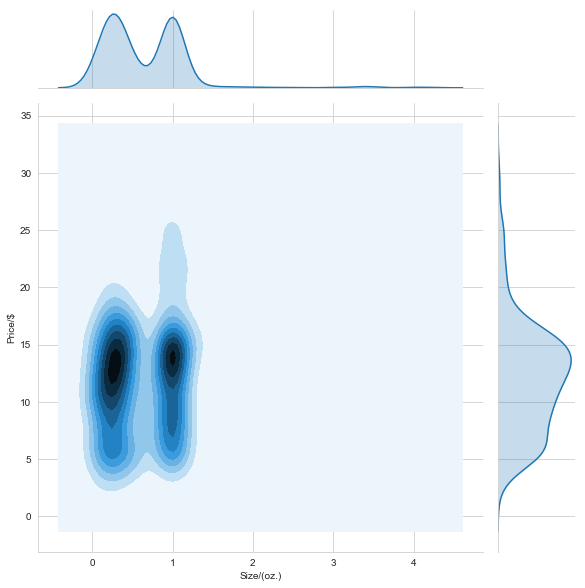

In [57]:
sns.set_style("whitegrid")
plt3=sns.jointplot(x="Size", y="Price", data=walgdf, kind='kde', height=8.27, )
plt3 = (plt3.set_axis_labels("Size/(oz.)","Price/$"))
#plt.title("Is there a relationship between size and price?")
plt.show(plt3)

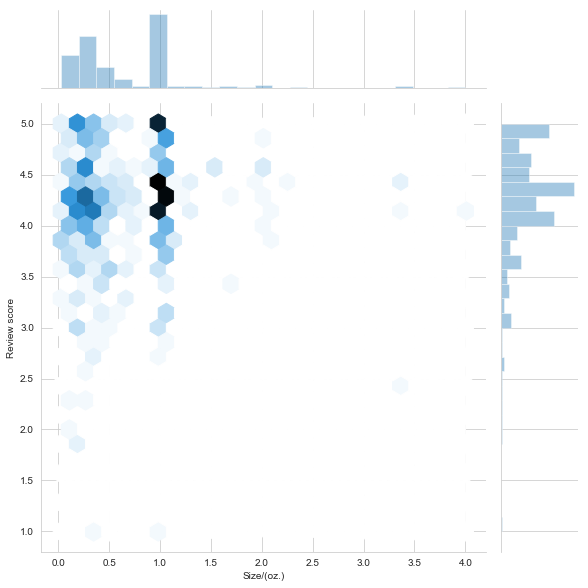

In [58]:
sns.set_style("whitegrid")
plt6=sns.jointplot(x="Size", y="Rev_score", data=walgdf, kind='hex', height=8.27, )
plt6 = (plt6.set_axis_labels("Size/(oz.)","Review score"))
#plt.title("Is there a relationship between size and price?")
plt.show(plt3)

In [59]:
print(walgdf.Brand.value_counts().head(10))
print(walgdf.Brand.value_counts().tail(5))
print(walgdf.Brand.nunique()) #38 brands

CoverGirl     76
Maybelline    62
Revlon        54
L'Oreal       54
Physicians    48
Neutrogena    47
e.l.f.        43
Wet n Wild    42
Milani        38
NYX           38
Name: Brand, dtype: int64
Burt's      1
Asepxia     1
Bonne       1
La          1
Botanics    1
Name: Brand, dtype: int64
38


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

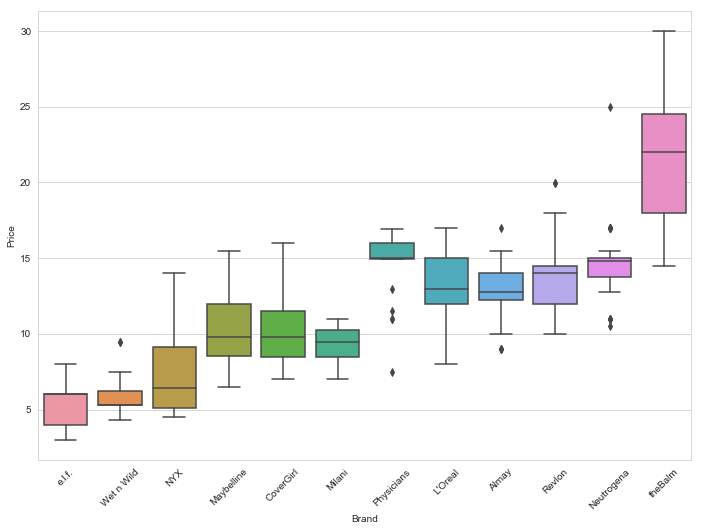

In [60]:
walgBrand = walgdf.groupby('Brand').filter(lambda x: len(x)>30).sort_values(by='Price')
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_style("whitegrid", {'xtick.color': '1','yxtick.color': '1'})
plt1 = sns.boxplot(x="Brand", y="Price", data=walgBrand, ax=ax) # Brands with more than 30 items
plt.xticks(rotation = 45)

In [1]:
#df_full.Country.value_counts()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

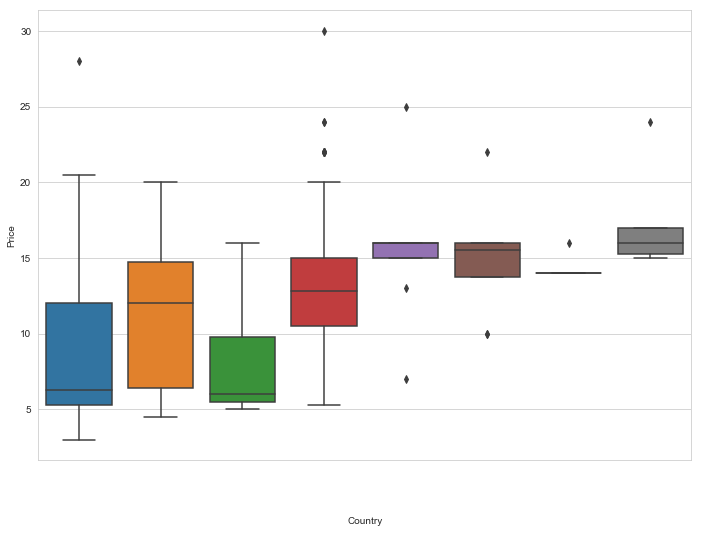

In [62]:
walgCtry = walgdf.groupby('Country').filter(lambda x: len(x)>9).sort_values(by='Price')
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_style("whitegrid", {'xtick.color': '1','yxtick.color': '1'})
plot4 = sns.boxplot(x="Country", y="Price", data=walgCtry)
plt.xticks(rotation = 45)

In [65]:
walgdf['Shop'] = "WalG"

## __Joined dataset__

In [66]:
shops=[ultadf, walgdf]
df_full = pd.concat(shops)
df_full.sample(30)

/Users/b.lwz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Brand,Country,Ingredients,Price,Product,Rev_count,Rev_score,Shop,Size
263,e.l.f.,China,"Titanium Dioxide (5.5%), Octyl Salicylate (2%)",NaN,e.l.f. Studio Flawless Finish Foundation SPF 1...,1854.0,3.9,WalG,0.08
1547,Catrice,NaN,"Shades 1,2: Octyldodecanol, Caprylic / Capric ...",6.49,Online Only Allround Contouring Palette,NaN,NaN,Ulta,0.21
84,NARS,NaN,"Caracas: Cyclopentasiloxane, Water/Aqua/Eau, B...",47.00,Sheer Glow Foundation,224.0,75.0,Ulta,1.00
582,Juice Beauty,NaN,02 Seashell: Cocos Nucifera (Organic Coconut O...,25.00,PHYTO-PIGMENTS Last Looks Cream Blush,71.0,89.0,Ulta,0.11
1310,FLOWER Beauty,NaN,NaN,14.99,Pore Perfect Instant Blur Stick + Multi-taskin...,36.0,88.0,Ulta,0.35
1180,Wet n Wild,NaN,NaN,5.49,Photo Focus Matte Finish Setting Spray,NaN,NaN,Ulta,1.52
46,Wet n Wild,China,NaN,5.29,"Wet n Wild MegaGlo Highlighting Powders, Golde...",6.0,4.8,WalG,1.00
1521,e.l.f. Cosmetics,NaN,"Isononyl Isononanoate, Hydrogenated Polyisobut...",6.00,Online Only HD Mattifying Cream Foundation,6.0,100.0,Ulta,0.34
1545,Catrice,NaN,NaN,7.99,Online Only Deluxe Glow Highlighter,NaN,NaN,Ulta,0.35
118,Too Faced,NaN,"Milk Chocolate: Talc, Mica, Titanium Dioxide, ...",30.00,Chocolate Soleil Matte Bronzer,210.0,77.0,Ulta,0.28


(array([0, 1]), <a list of 2 Text xticklabel objects>)

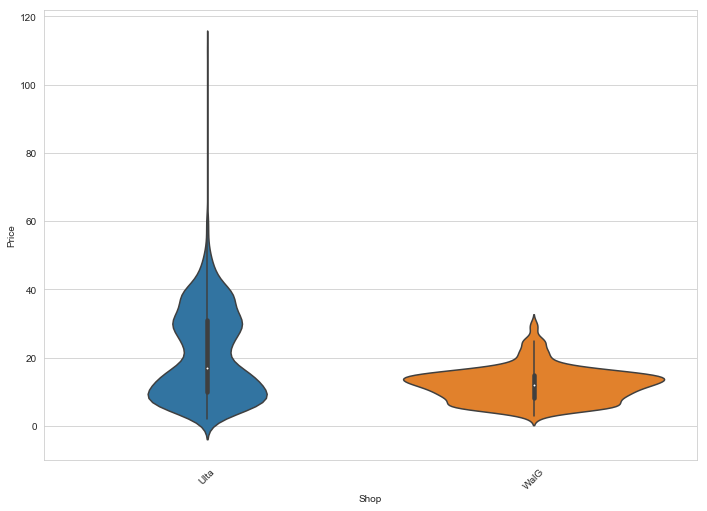

In [67]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_style("whitegrid")
plt5 = sns.violinplot(x="Shop", y="Price", data=df_full)
plt.xticks(rotation = 45)

In [68]:
df_Brand = df_full.groupby("Brand").filter(lambda x: len(x)>5)
df_Brand.Brand.nunique()

83

In [69]:
df_Brand2 = pd.concat([df_Brand, df_Brand['Ingredients'].str.get_dummies(sep=', ')], axis=1)
df_Brand2.sample(10)

,Brand,Country,Ingredients,Price,Product,Rev_count,Rev_score,Shop,Size,Talc,...,sodium hydroxide,sodium lactate,sorbitan oleate decylglucoside crosspolymer,sorbitol,tetrasodium edta,titanium dioxide,titanium dioxide (15%),tocopherol,trisiloxane,xanthan gum
154,Benefit Cosmetics,NaN,"Aqua (Water), Phenyl Trimethicone, Alcohol Den...",30.00,Hello Happy Soft Blur Foundation SPF 15,453.0,80.0,Ulta,1.00,0,...,0,0,0,0,0,0,0,0,0,0
1182,Benefit Cosmetics,NaN,"Cyclopentasiloxane, Dimethicone, Dimethicone/V...",32.00,POREfect Primer Deal! Set,NaN,NaN,Ulta,NaN,0,...,0,0,0,0,0,0,0,0,0,0
81,Tarte,NaN,"Medium: Active: Titanium Dioxide 4.55%, Zinc O...",37.00,BB Tinted Treatment 12 Hour Primer Broad Spect...,1475.0,92.0,Ulta,1.00,0,...,0,0,0,0,0,0,0,0,0,0
714,COVER FX,NaN,"Water (Aqua, Eau), Butylene Glycol, Kaolin, PV...",31.00,Mattifying Setting Spray,20.0,100.0,Ulta,4.00,0,...,0,0,0,0,0,0,0,0,0,0
218,Garnier,NaN,"Aqua / Water, Hexylene Glycol, Glycerin, Disod...",8.99,SkinActive Micellar Cleansing Water All-in-1 C...,1052.0,89.0,Ulta,NaN,0,...,0,0,0,0,0,0,0,0,0,0
683,CoverGirl,USA,"Aqua/Water/Eau, Cyclopentasiloxane, Talc, Glyc...",11.49,"CoverGirl TruBlend It's Lit Concealer, Fair L0-L2",176.0,4.2,WalG,0.10,0,...,0,0,0,0,0,0,0,0,0,0
514,Anastasia Beverly Hills,NaN,"Adore:\n\nVelvet: Talc, Synthetic Fluorphlogop...",30.00,Blush Trios,151.0,92.0,Ulta,0.11,0,...,0,0,0,0,0,0,0,0,0,0
632,theBalm,NaN,"Tridecyl Trimellitate, Neopentyl Glycol Dicapr...",18.00,theBalm TimeBalm Concealer Light Medium,20.0,NaN,WalG,0.26,0,...,0,0,0,0,0,0,0,0,0,0
239,e.l.f.,China,"Titanium Dioxide (5.5%), Octyl Salicylate (2%)",NaN,e.l.f. Studio Flawless Finish Foundation SPF 1...,1854.0,3.9,WalG,0.08,0,...,0,0,0,0,0,0,0,0,0,0
112,Urban Decay Cosmetics,NaN,"Dimethicone, Nylon-12, Silica, Zinc Stearate, ...",34.00,All Nighter Waterproof Setting Powder,130.0,78.0,Ulta,0.26,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_Brand3 = pd.melt(df_Brand2, 
                    id_vars=['Product','Brand','Ingredients','Price','Rev_score','Size','Rev_count','Shop','Country'],
                      value_name="Included", var_name="Ing")
df_Brand3 = df_Brand3[df_Brand3.Included != 0]
df_Brand3.sample(20)

,Product,Brand,Ingredients,Price,Rev_score,Size,Rev_count,Shop,Country,Ing,Included
9538776,Tutti Frutti - Fruit Cocktail Blush Duo,Too Faced,"Cherry Bomb:\n\nStrobe/Sparkle: Mica, Talc, Et...",30.00,93.0,0.22,80.0,Ulta,NaN,Polyethylene Terephthalate,1
2094405,Complexionista Mini Contour Palette,Benefit Cosmetics,"Dandelion Twinkle: Synthetic Fluorphlogopite, ...",32.00,100.0,NaN,13.0,Ulta,NaN,CI 19140 (Yellow 5,1
8027589,Nonie Creme Colour Prevails Blank Canvas Liqui...,Nonie,"Water, Cyclopentasiloxane, Dimethicone/Vinyl D...",NaN,4.7,1.00,22.0,WalG,China,Niacinamide,1
10316355,Online Only Love Struck Blusher + Bronzer,J.Cat Beauty,"Talc, Cetyl Dimethicone, Methyl Methacrylate C...",3.99,66.0,0.26,50.0,Ulta,NaN,Red Iron Oxide (CI 77491),1
4962827,"No7 Match Made Foundation Drops, Warm Ivory",No7,"Aqua (Water), Caprylyl methicone, Caprylic/cap...",14.99,4.4,0.50,193.0,WalG,France,Ethylparaben,1
5411783,Online Only Ocean Feel Highlighter,KIKO Milano,"Mica, Talc, Alumina, Caprylic/Capric Triglycer...",22.00,100.0,0.30,8.0,Ulta,NaN,Glycerin,1
6953983,Online Only Smooth Affair Facial Primer & Brig...,jane iredale,"Aqua/Water/Eau, Coconut Alkanes (and) Polysili...",50.00,95.0,1.70,21.0,Ulta,NaN,Lecithin,1
5769727,Hyper Real Palette: Shimmy Peach,MAC,"Talc, Isostearyl Neopentanoate, Zinc Stearate,...",39.50,NaN,0.45,NaN,Ulta,NaN,Hexylene Glycol,1
4922298,Treasure Pot Glitter Gel,Tarte,"Water/Aqua/Eau, Polybutylene Terephthalate, Po...",18.00,92.0,0.47,18.0,Ulta,NaN,Ethylhexylglycerin,1
7024489,De-Slick Complexion Primer,Urban Decay Cosmetics,"Aqua / Water, Argilla / Magnesium Aluminum Sil...",36.00,NaN,0.95,NaN,Ulta,NaN,Limonene,1


In [71]:
print(df_Brand3.Ing.nunique())
print(df_Brand3.shape)

6066
(43061, 11)


In [72]:
ingcount = df_Brand3.groupby('Ing').size().reset_index(name='counts').sort_values(by = 'counts', ascending=False)
ingcount.head(15)

,Ing,counts
4186,Phenoxyethanol,905
2008,Dimethicone,834
4896,Silica,788
3528,Mica,607
1342,Caprylyl Glycol,559
2453,Glycerin,546
1064,CI 77492,536
5506,Tocopheryl Acetate,471
5243,Talc,470
1890,Cyclopentasiloxane,408


In [73]:
ingcount[ingcount['Ing'].str.contains("paraben")]

,Ing,counts
3521,Methylparaben,166
4489,Propylparaben,109
2249,Ethylparaben,65
794,Butylparaben,36
2953,Isobutylparaben,15
3522,Methylparaben.,6
4498,Propylparaben. May Contain: Titanium Dioxide (...,4
3002,Isopropylparaben,3
4494,Propylparaben. May Contain: Iron Oxides,3
3478,Methicone Propylparaben,2


In [74]:
df_Brand3['Parabens'] = df_Brand3['Ing'].apply(lambda x: 1 if 'paraben' in x else 0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

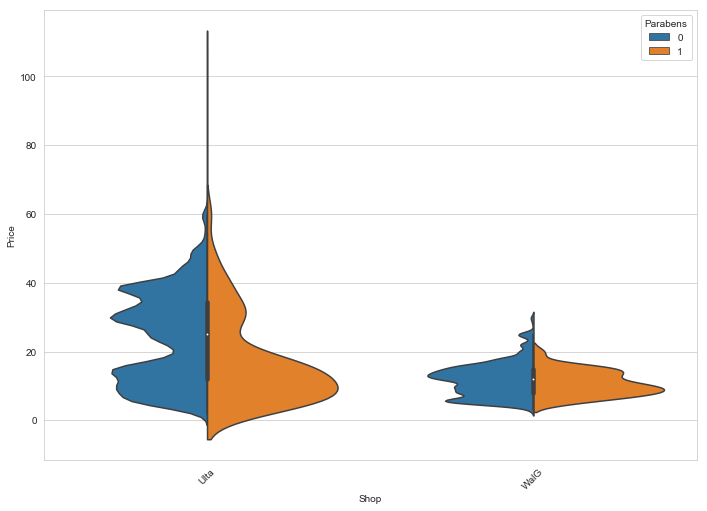

In [75]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_style("whitegrid")
plt4 = sns.violinplot(x="Shop", y="Price", data=df_Brand3, hue="Parabens", split=True)
plt.xticks(rotation = 45)

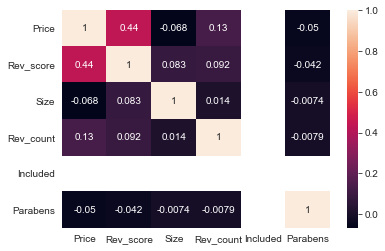

In [76]:
df_corr = df_Brand3.corr()
sns.heatmap(df_corr, 
        xticklabels=df_corr.columns,
        yticklabels=df_corr.columns, annot=True)

In [77]:
df_corr

,Price,Rev_score,Size,Rev_count,Included,Parabens
Price,1.000000,0.435178,-0.067771,0.131212,NaN,-0.050085
Rev_score,0.435178,1.000000,0.082961,0.092256,NaN,-0.042122
Size,-0.067771,0.082961,1.000000,0.014194,NaN,-0.007442
Rev_count,0.131212,0.092256,0.014194,1.000000,NaN,-0.007867
Included,NaN,NaN,NaN,NaN,NaN,NaN
Parabens,-0.050085,-0.042122,-0.007442,-0.007867,NaN,1.000000
